In [1]:
import jax
import jax.numpy as jnp
import matplotlib.pyplot as plt

from functools import partial

from dtumpc.plotting import plot_results
from dtumpc.simulation import simulate
from dtumpc.models import (
    default_params,
    sensor_deterministic, 
    sensor_stochastic, 
    disturbance_constant, 
    disturbance_piecewise_constant, 
    disturbance_sde
)

In [2]:
key = jax.random.key(0)

In [3]:
class PIDController:
    def __init__(self, target: jnp.array, p=0, i=0, d=0):
        self.target = target
        
        self.p = p
        self.i = i
        self.d = d

        self.prev = None
        self.int = jnp.zeros(2)

    def __call__(self, t, observation):

        error = self.target[t] - observation[:2]

        p = self.p * error

        self.int += error
        i = self.i * self.int

        if self.prev is not None:
            d = self.d * (error - self.prev)
        else:
            d = jnp.zeros(2)

        self.prev = error

        return p + i + d
    
    def __repr__(self):
        return f"PID[P={self.p}, I={self.i}, D={self.d}]"

In [4]:
disturbance = partial(disturbance_constant, value=jnp.array([0.0, 0.0]))

In [5]:
setpoints_constant = jnp.ones((3600, 2)) * 20
setpoints_varying = jnp.vstack([
    jnp.ones((1200, 2)) * 20,
    jnp.ones((1200, 2)) * 30,
    jnp.ones((1200, 2)) * 20,
])

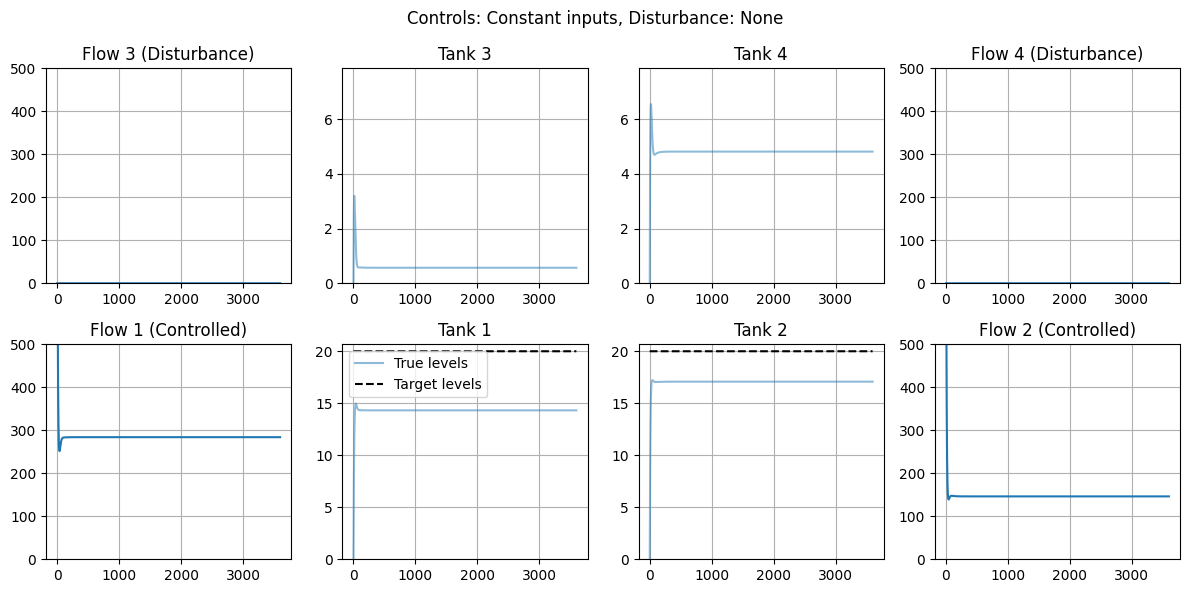

In [6]:
key, subkey = jax.random.split(key)

states, inputs, observations = simulate(
    PIDController(setpoints_constant, p=50),
    disturbance,
    sensor_deterministic,
    default_params,
    subkey,
)

plot_results(
    states, 
    inputs, 
    "Constant inputs", 
    "None",
    observations=None,
    targets=setpoints_constant,
)

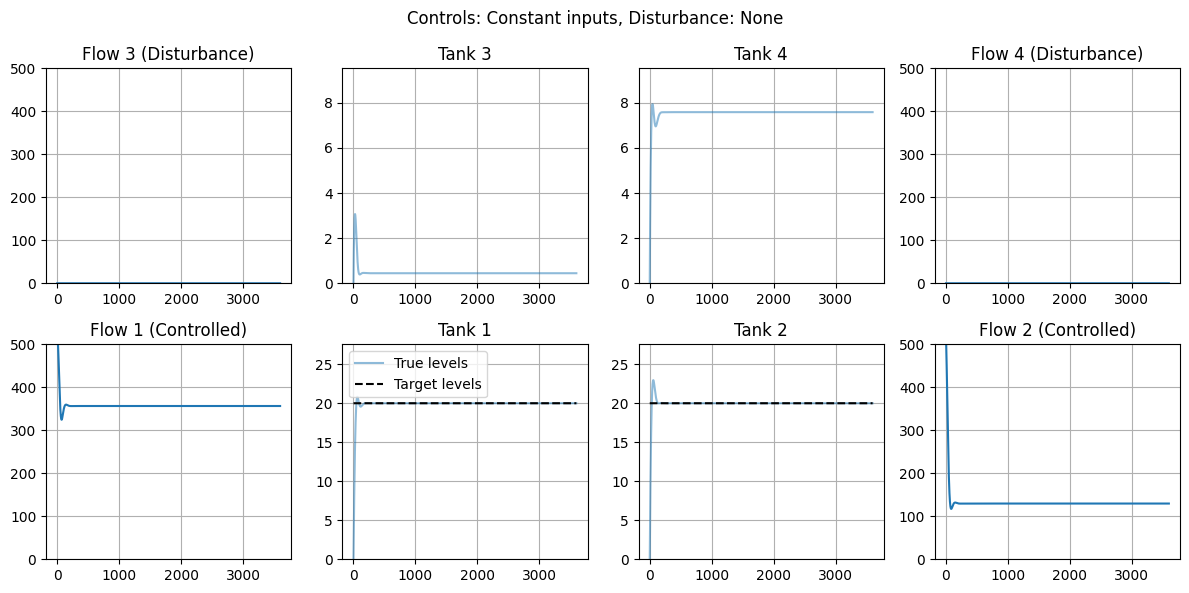

In [7]:
key, subkey = jax.random.split(key)

states, inputs, observations = simulate(
    PIDController(setpoints_constant, p=25, i=1),
    disturbance,
    sensor_deterministic,
    default_params,
    subkey,
)

plot_results(
    states, 
    inputs, 
    "Constant inputs", 
    "None",
    observations=None,
    targets=setpoints_constant,
)

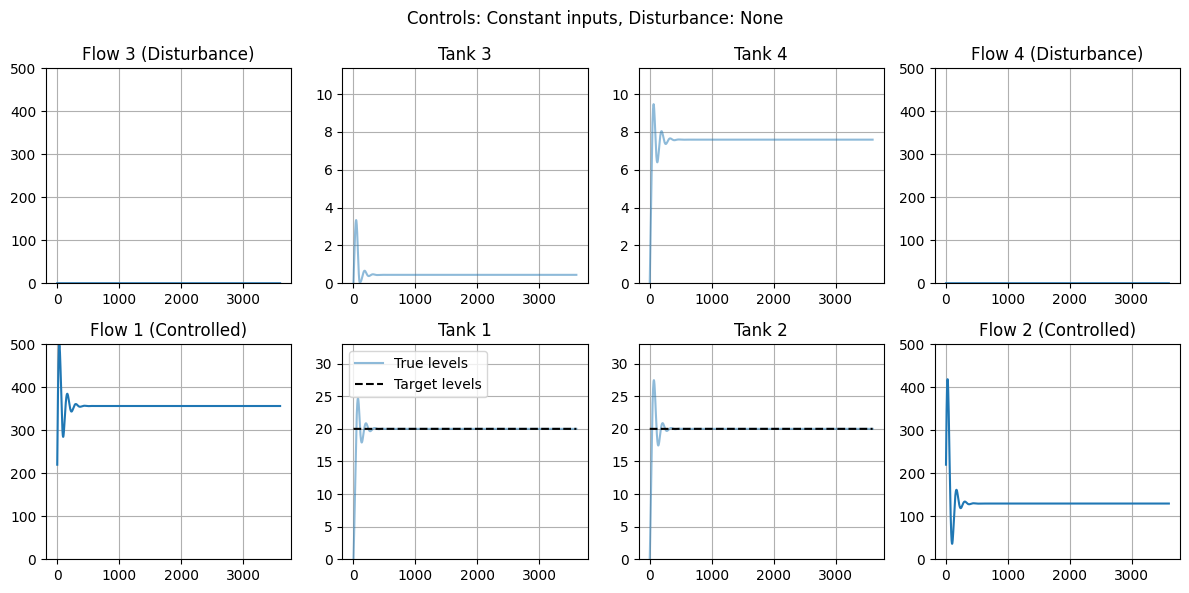

In [8]:
key, subkey = jax.random.split(key)

states, inputs, observations = simulate(
    PIDController(setpoints_constant, p=10, i=1, d=1),
    disturbance,
    sensor_deterministic,
    default_params,
    subkey,
)

plot_results(
    states, 
    inputs, 
    "Constant inputs", 
    "None",
    observations=None,
    targets=setpoints_constant,
)

In [9]:
sensor = partial(sensor_stochastic, std=1)

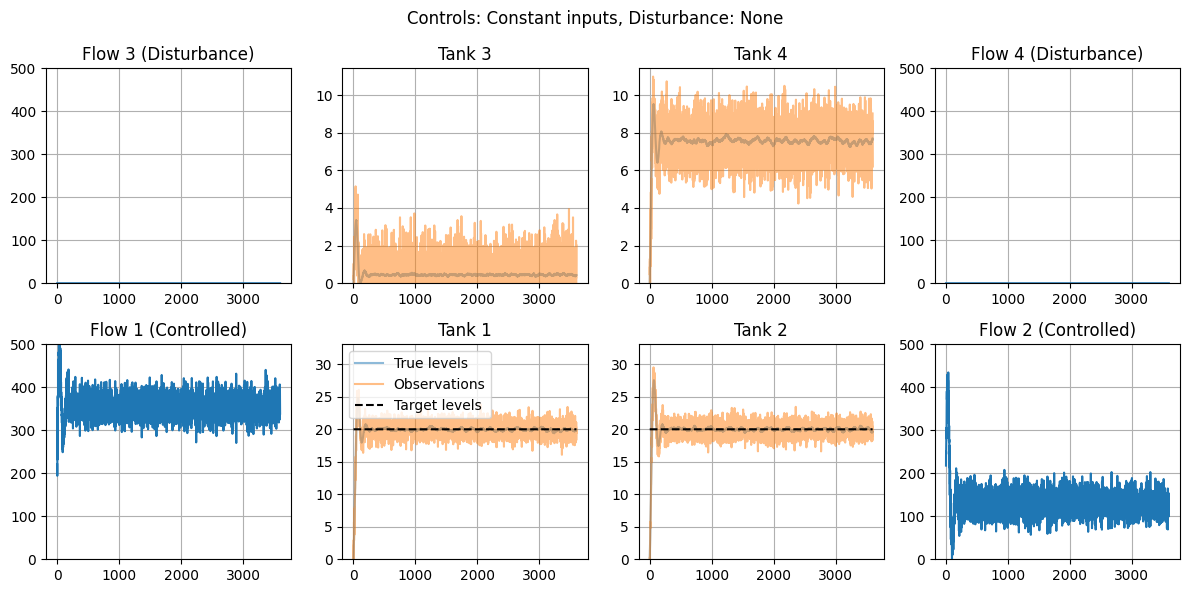

In [10]:
key, subkey = jax.random.split(key)

states, inputs, observations = simulate(
    PIDController(setpoints_constant, p=10, i=1, d=10),
    disturbance,
    sensor,
    default_params,
    subkey,
)

plot_results(
    states, 
    inputs, 
    "Constant inputs", 
    "None",
    observations=observations,
    targets=setpoints_constant,
)

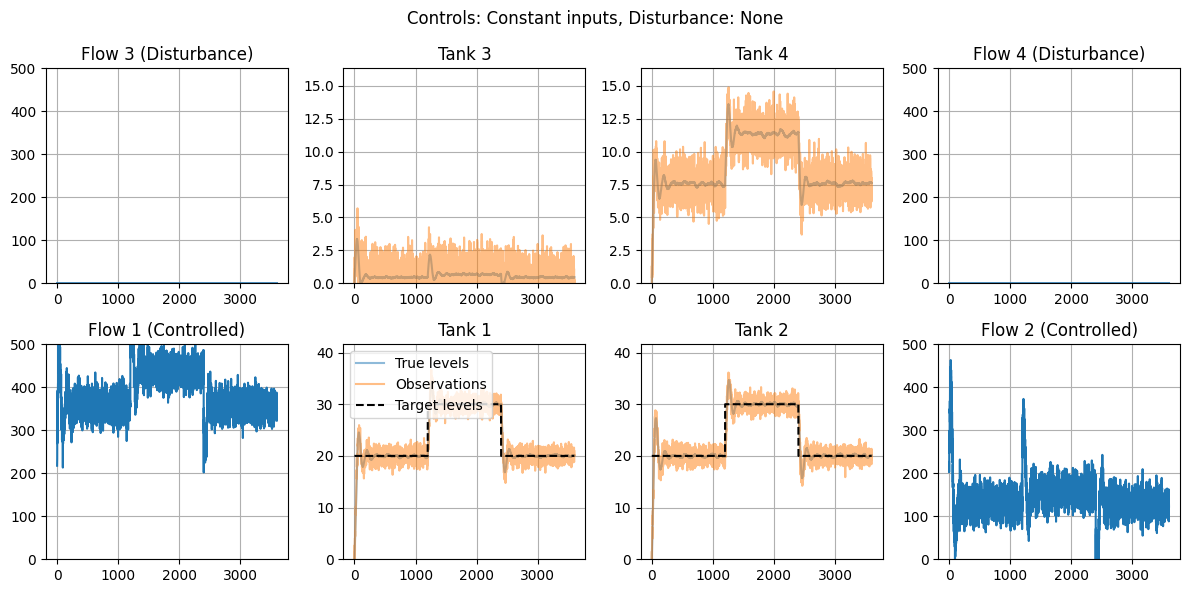

In [11]:
key, subkey = jax.random.split(key)

states, inputs, observations = simulate(
    PIDController(setpoints_varying, p=10, i=1, d=10),
    disturbance,
    sensor,
    default_params,
    subkey,
)

plot_results(
    states, 
    inputs, 
    "Constant inputs", 
    "None",
    observations=observations,
    targets=setpoints_varying,
)

In [12]:
scale = 900
values = jax.random.uniform(key, shape=(3600 // scale, 2), minval=0, maxval=200)

disturbance = partial(disturbance_piecewise_constant, values=values, scale=scale)


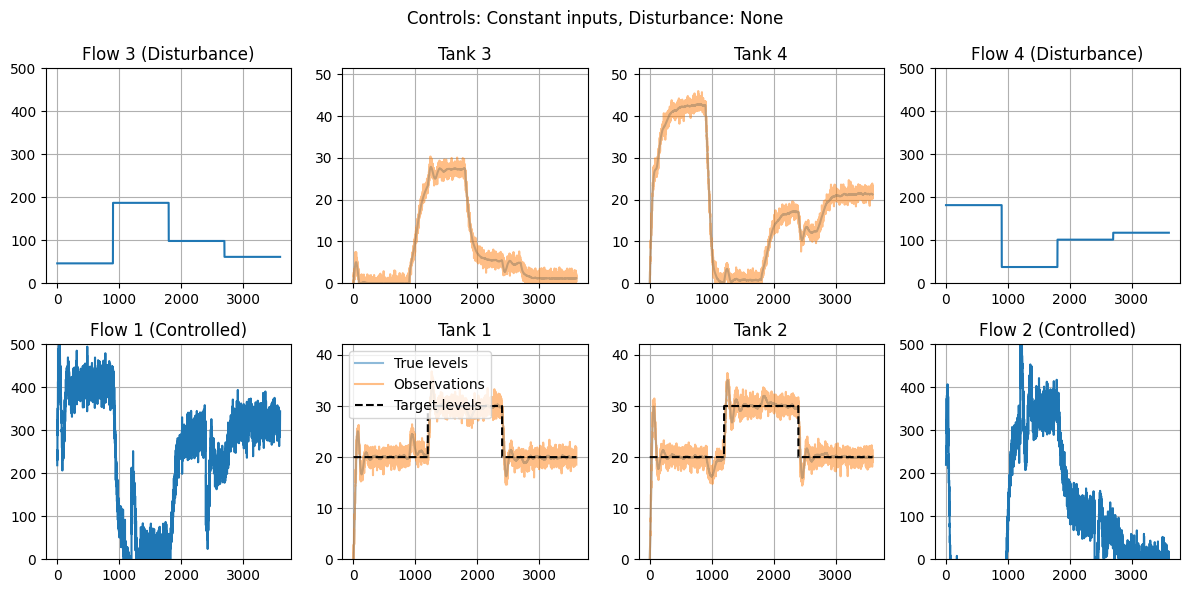

In [13]:
key, subkey = jax.random.split(key)

states, inputs, observations = simulate(
    PIDController(setpoints_varying, p=10, i=1, d=10),
    disturbance,
    sensor,
    default_params,
    subkey,
)

plot_results(
    states, 
    inputs, 
    "Constant inputs", 
    "None",
    observations=observations,
    targets=setpoints_varying,
)